# Breast Cancer Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model


## 1) Problem statement.

* We will be asked to predict if the patients received metastatic cancer diagnosis within 90 days of screening

**In this project we are going to use the data given to build a Classification model:**

* This can be used to reccomend the probility of receiving metastatic cancer diagnosis within 90 days of screening based on the given dataset.

## 2)Why is this important?

* Metastatic TNBC is considered the most aggressive TNBC and requires most urgent and timely treatment. Unnecessary delays in diagnosis and subsequent treatment can have devastating effects in these difficult cancers. Differences in the wait time to get treatment is a good proxy for disparities in healthcare access.

* The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if environmental hazards impact proper diagnosis and treatment.

## 3) Data Collection.
* The Dataset constains unique oncology information provided by WiDS Datathon
* The data consists of 12906 Rows and 83 Columns

https://www.kaggle.com/competitions/widsdatathon2024-challenge1/data

### 3.1 Import Data and Required Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
# import optuna
from category_encoders import OneHotEncoder, MEstimateEncoder, CatBoostEncoder, OrdinalEncoder
from sklearn import set_config
import category_encoders
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import FunctionTransformer,StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
pd.set_option('display.max_rows', 150)
import gdown

In [3]:
''

''

In [2]:
dfTraining = pd.read_csv(r"training.csv")
dfTest = pd.read_csv(r"test.csv")
dfSub  = pd.read_csv(r"sample_submission.csv")

#DATA UNDERSTANDING & PREPROCESSING

In [3]:
dfTraining.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [4]:
dfTraining.shape

(12906, 83)

In [5]:
dfTest.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
dfTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

**Summary of the dataset**

In [7]:
# Display summary statistics for a dataframe
desc = pd.DataFrame(index = list(dfTraining))
desc['type'] = dfTraining.dtypes
desc['count'] = dfTraining.count()
desc['nunique'] = dfTraining.nunique()
desc['%unique'] = desc['nunique'] /len(dfTraining) * 100
desc['null'] = dfTraining.isnull().sum()
desc['%null'] = desc['null'] / len(dfTraining) * 100
desc = pd.concat([desc,dfTraining.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,12906,12906,100.000000,0,0.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,int64,12906,739,5.726019,0,0.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,int64,12906,67,0.519138,0,0.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
DiagPeriodL90D,int64,12906,2,0.015497,0,0.000000,0.624516,0.484266,0.000000,0.000000,1.000000,1.000000,1.000000
population,float64,12905,738,5.718271,1,0.007748,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,float64,12905,738,5.718271,1,0.007748,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,float64,12905,728,5.640787,1,0.007748,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,float64,12905,718,5.563304,1,0.007748,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,float64,12905,725,5.617542,1,0.007748,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,float64,12905,724,5.609794,1,0.007748,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


In [8]:
desc = pd.DataFrame(index = list(dfTest))
desc['type'] = dfTest.dtypes
desc['count'] = dfTest.count()
desc['nunique'] = dfTest.nunique()
desc['%unique'] = desc['nunique'] /len(dfTest) * 100
desc['null'] = dfTest.isnull().sum()
desc['%null'] = desc['null'] / len(dfTest) * 100
desc = pd.concat([desc,dfTest.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,5792,5792,100.000000,0,0.000000,549946.787983,260988.833446,100266.000000,320284.500000,553042.000000,778552.250000,999890.000000
patient_zip3,int64,5792,679,11.723066,0,0.000000,570.217887,275.314510,101.000000,329.000000,554.000000,836.000000,996.000000
patient_age,int64,5792,67,1.156768,0,0.000000,59.274862,13.076323,18.000000,50.000000,59.000000,67.000000,91.000000
population,float64,5792,679,11.723066,0,0.000000,20266.872152,13694.738314,829.515152,8863.550000,18711.016665,28996.772730,71374.131580
density,float64,5792,679,11.723066,0,0.000000,1510.471786,2883.409750,0.821739,161.925000,626.236667,1612.851111,21172.000000
age_median,float64,5792,670,11.567680,0,0.000000,40.575472,4.029852,20.600000,37.190476,40.640909,43.085938,54.570000
age_under_10,float64,5792,660,11.395028,0,0.000000,11.119250,1.478579,0.000000,10.160000,11.039216,12.143396,16.481818
age_10_to_19,float64,5792,668,11.533149,0,0.000000,12.919191,1.909698,6.314286,11.726471,12.923944,13.904830,35.300000
age_20s,float64,5792,667,11.515884,0,0.000000,13.218348,3.294389,5.925000,10.996226,12.531646,14.937500,62.100000
age_30s,float64,5792,668,11.533149,0,0.000000,12.841374,2.358636,1.500000,11.211818,12.404348,14.037838,25.471429


In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in dfTraining.columns if dfTraining[feature].dtype != 'O']
categorical_features = [feature for feature in dfTraining.columns if dfTraining[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 72 numerical features : ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_de

## 3. EXPLORING DATA

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

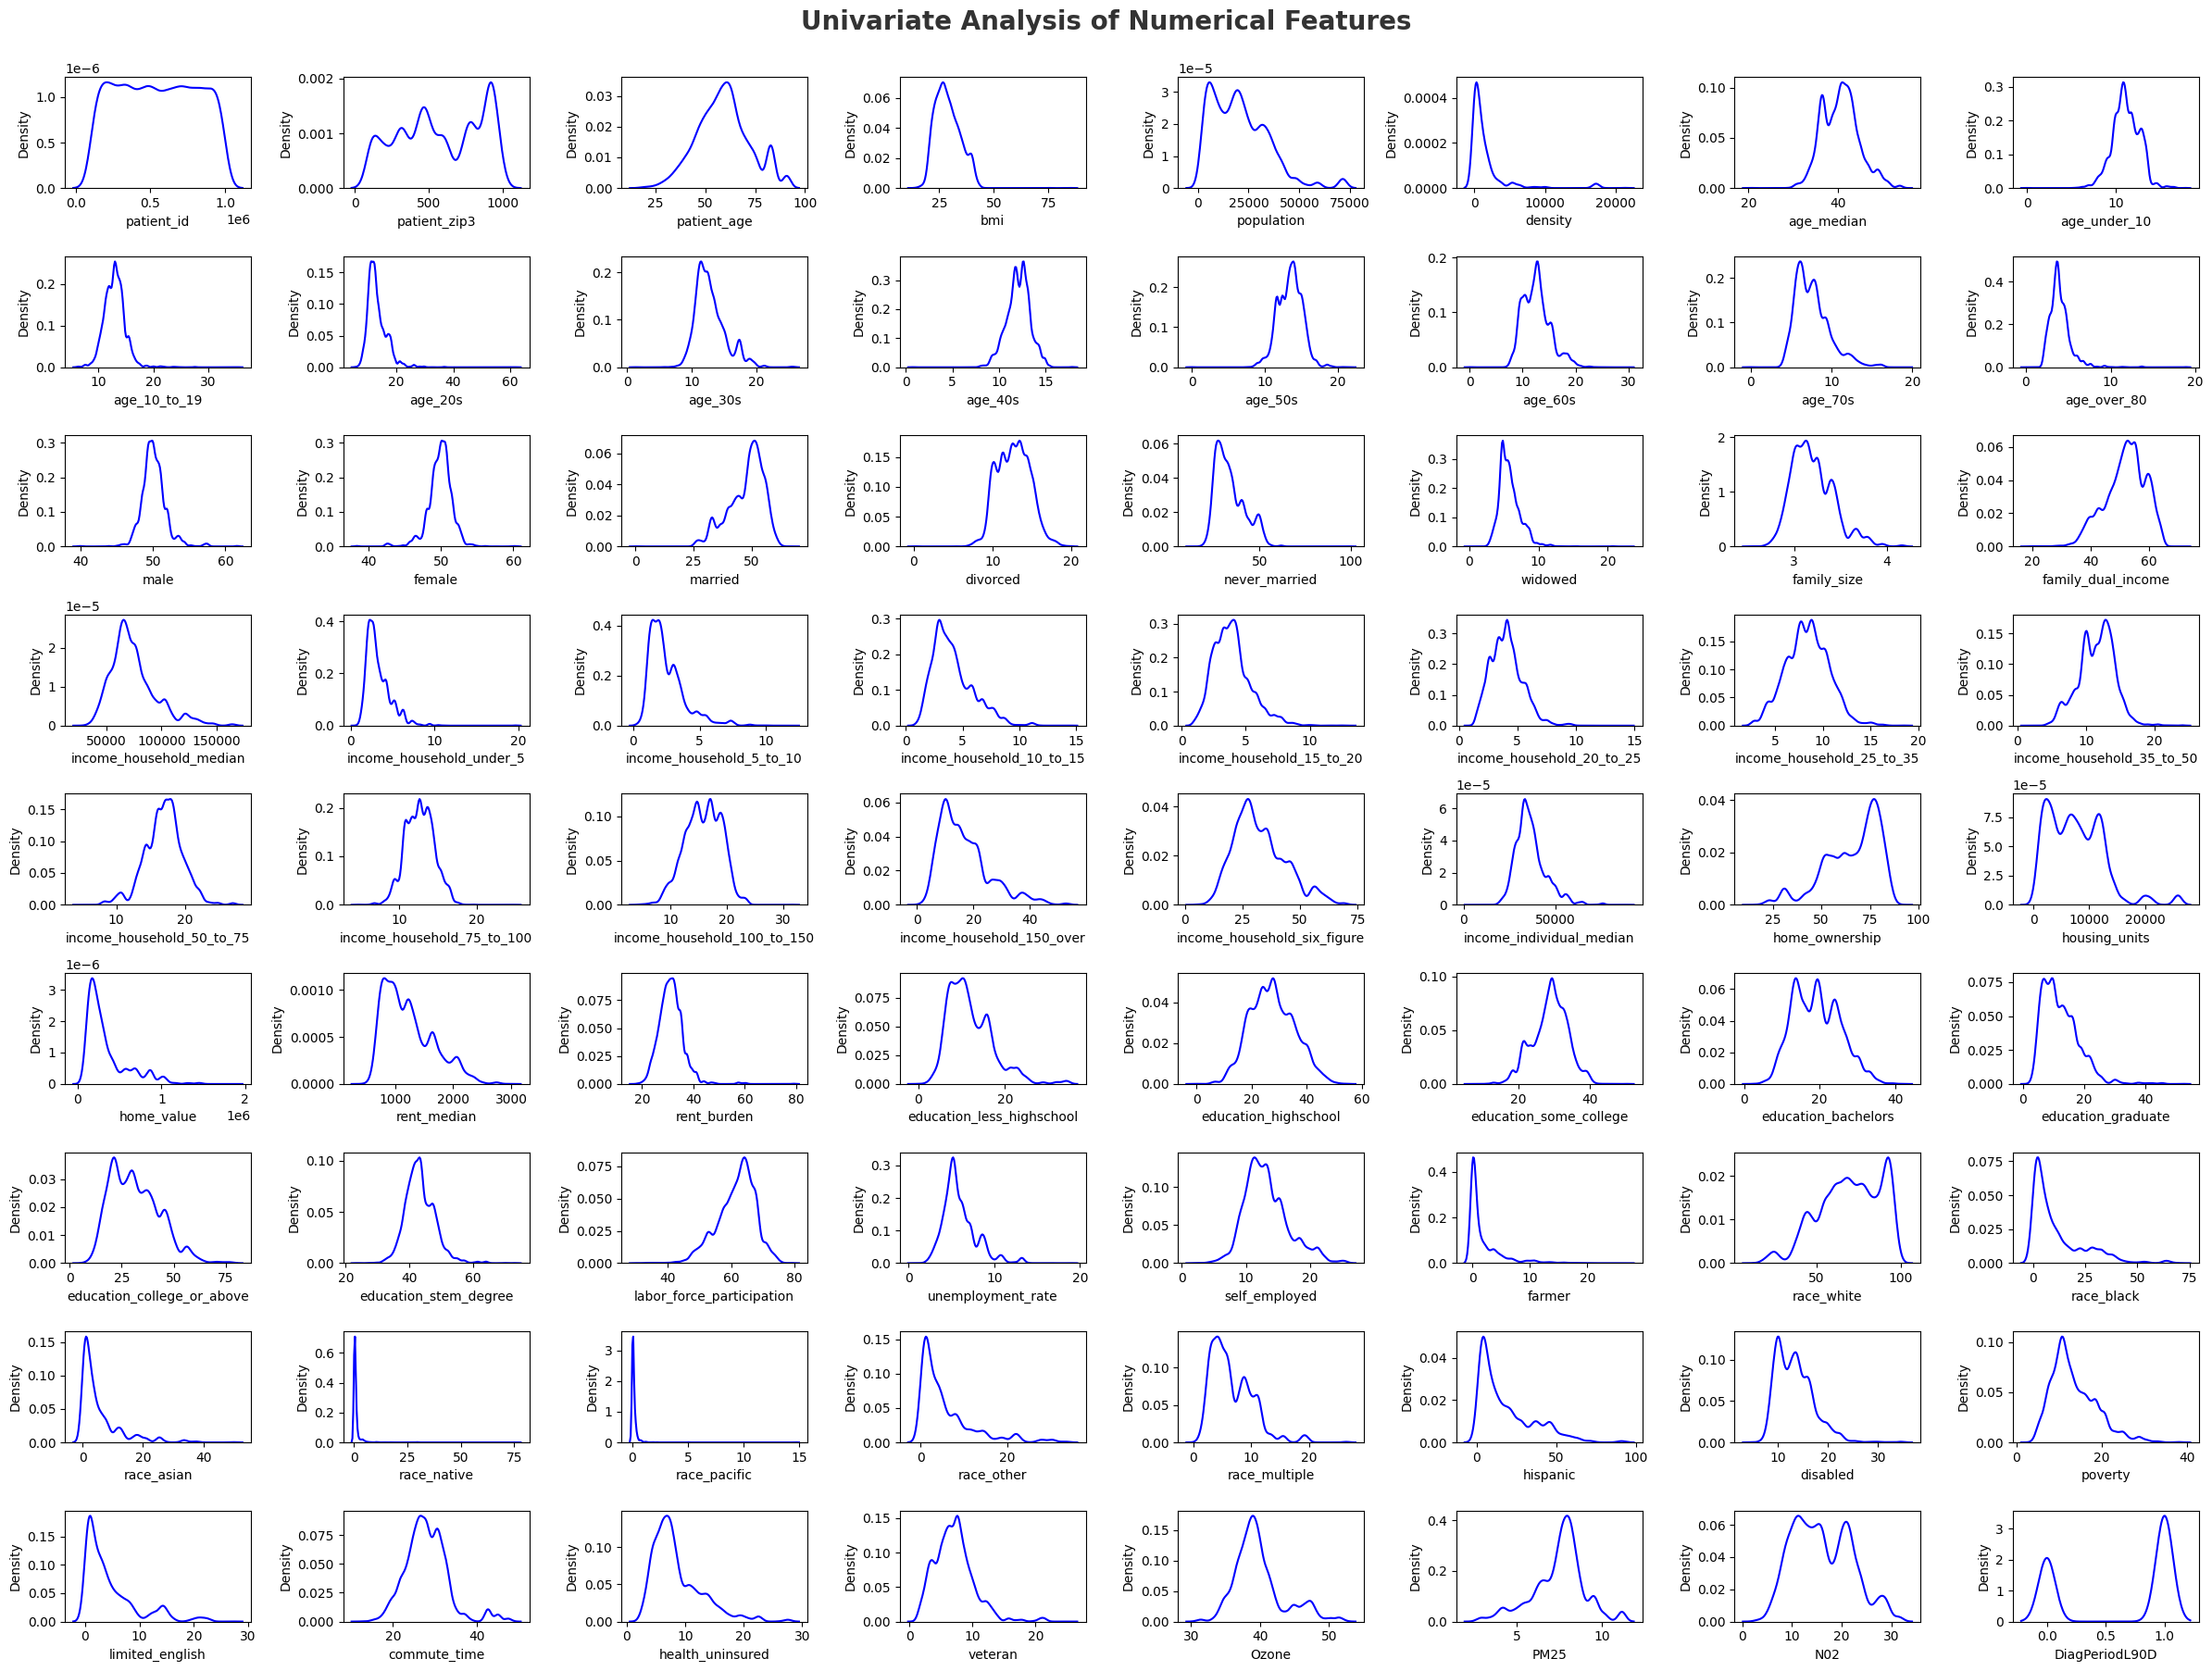

In [10]:
num_features = len(numeric_features)  


rows, cols = 9,8
plt.figure(figsize=(24, 18))  
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20,
            fontweight='bold', alpha=0.8, y=1.0)

for i in range(num_features):
    feature_name = numeric_features[i]
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(x=dfTraining[feature_name], color='blue')
    plt.xlabel(feature_name)  

plt.tight_layout() 


### Categorical Features

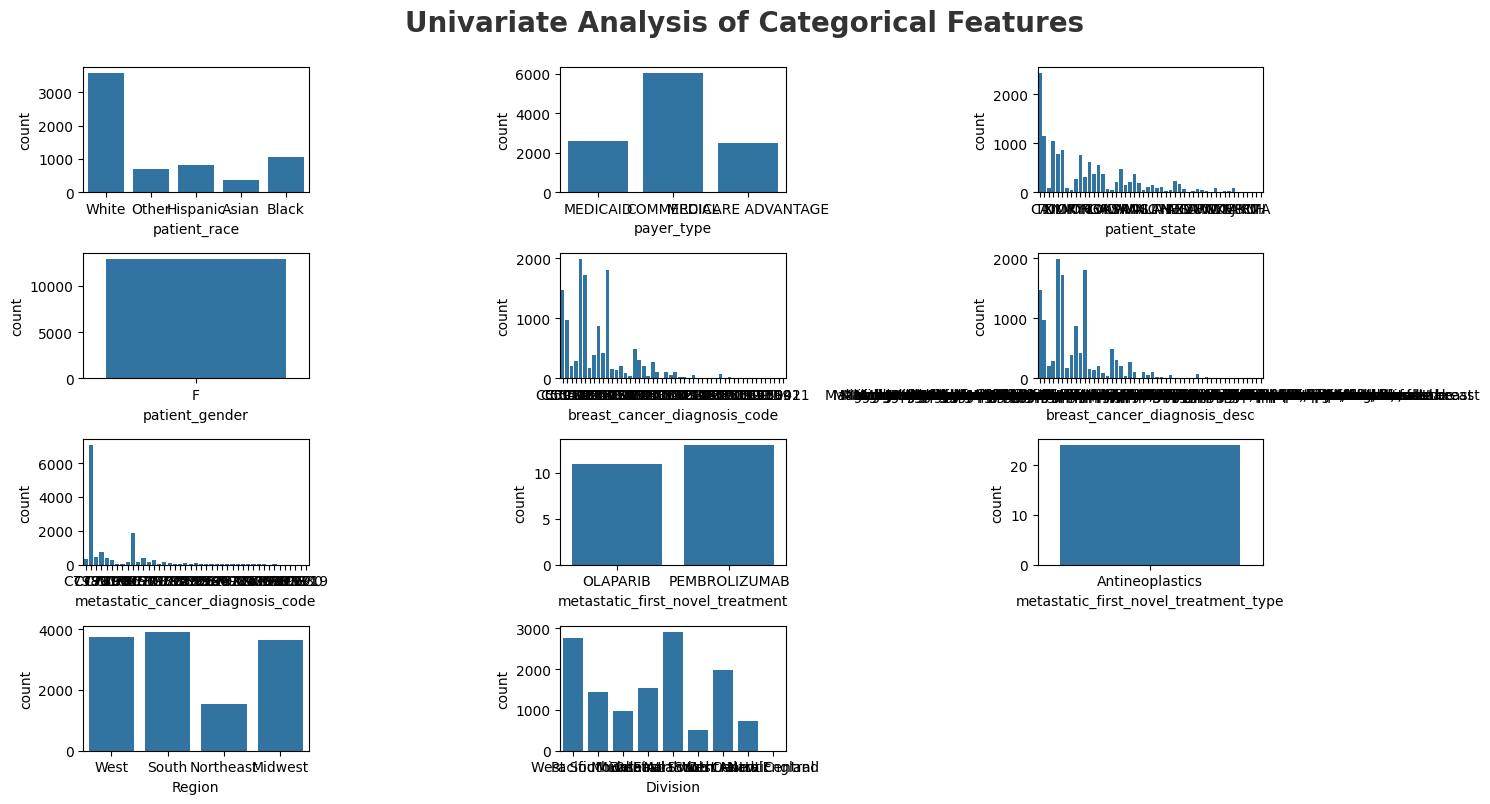

In [11]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=dfTraining[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

In [12]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(dfTraining['DiagPeriodL90D'], dfTraining[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,patient_race,Reject Null Hypothesis
1,payer_type,Reject Null Hypothesis
2,patient_state,Reject Null Hypothesis
3,patient_gender,Fail to Reject Null Hypothesis
4,breast_cancer_diagnosis_code,Reject Null Hypothesis
5,breast_cancer_diagnosis_desc,Reject Null Hypothesis
6,metastatic_cancer_diagnosis_code,Reject Null Hypothesis
7,metastatic_first_novel_treatment,Fail to Reject Null Hypothesis
8,metastatic_first_novel_treatment_type,Fail to Reject Null Hypothesis
9,Region,Reject Null Hypothesis


### Checking Null Values

In [13]:
dfTraining.isnull().sum()

patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

Delete the patient_gender column because the value in the column is constant

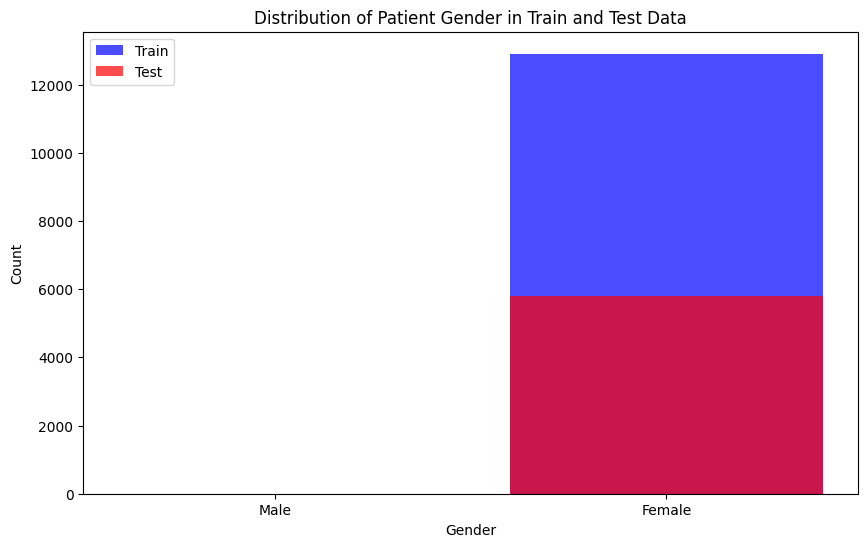

In [14]:
train_male = dfTraining[dfTraining['patient_gender'] == 'M']
train_female = dfTraining[dfTraining['patient_gender'] == 'F']

test_male = dfTest[dfTest['patient_gender'] == 'M']
test_female = dfTest[dfTest['patient_gender'] == 'F']

# Plotting
plt.figure(figsize=(10, 6))

# Plot train data
plt.bar(['Male', 'Female'], [len(train_male), len(train_female)], color='blue', alpha=0.7, label='Train')

# Plot test data
plt.bar(['Male', 'Female'], [len(test_male), len(test_female)], color='red', alpha=0.7, label='Test')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Patient Gender in Train and Test Data')
plt.legend()

# Show plot
plt.show()

In [15]:
dfTraining = dfTraining.drop(['patient_gender', 'female'], axis=1)
dfTest = dfTest.drop(['patient_gender', 'female'], axis=1)
dfTraining.shape

(12906, 81)

In the descriptive statistics above, there are several columns that have a missing value of one, here we hypothesize that the missing value data is in 1 row. Therefore, we check the missing value, if the hypothesis is true then the row that has many missing values will be deleted.

In [16]:
missing_population_data = dfTraining[dfTraining['population'].isnull()]
missing_population_data
# missing_population_data.isnull().sum().sum()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
10542,224030,Black,MEDICAID,FL,332,41,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C7800,...,NaN,NaN,NaN,NaN,NaN,NaN,35.544993,8.714016,16.558153,0


In [17]:
dfTraining = dfTraining.dropna(subset=['population']).reset_index(drop=True)

In [18]:
target = dfTraining['DiagPeriodL90D']
len(target)

12905

In [19]:
numerical_cols = list(dfTraining.select_dtypes(exclude=['object']).columns)
categorical_columns = list(dfTraining.select_dtypes(include=['object']).columns)

numerical_cols.remove('patient_zip3')
categorical_columns.append('patient_zip3')

In [20]:
# proportion of count data on categorical columns
for col in categorical_columns:
    print(dfTraining[col].value_counts(normalize=True) * 100)
    print('---------------------------')

patient_race
White       55.030675
Black       16.180982
Hispanic    12.714724
Other       10.475460
Asian        5.598160
Name: proportion, dtype: float64
---------------------------
payer_type
COMMERCIAL            54.332553
MEDICAID              23.130967
MEDICARE ADVANTAGE    22.536480
Name: proportion, dtype: float64
---------------------------
patient_state
CA    18.966859
TX     8.985530
NY     8.098646
MI     6.674965
IL     6.083709
OH     5.865878
FL     4.730045
GA     4.286603
PA     3.757585
MN     2.932939
CO     2.886261
VA     2.839583
IN     2.466158
KY     2.014937
AZ     1.781547
WI     1.649292
WA     1.555936
NC     1.447020
MO     1.244749
NM     1.096935
LA     1.081375
TN     0.871324
SC     0.855765
ID     0.723510
OK     0.723510
OR     0.692391
IA     0.669052
MS     0.591256
MD     0.552357
AR     0.490120
NV     0.482340
KS     0.388984
AL     0.388984
MT     0.350086
NE     0.311187
UT     0.280068
DE     0.256729
WV     0.210051
HI     0.163373
NJ     0.1

In the 'patient_zip3' column, we check whether the test data contains the code 'patient_zip3' which is not in the train data. After checking, there is data that does not exist in the train data so we change it to None.

In [21]:
uncommon_zip3 = dfTest[~dfTest['patient_zip3'].isin(dfTraining['patient_zip3'])]['patient_zip3']
print(len(uncommon_zip3))
dfTest.loc[dfTest['patient_zip3'].isin(uncommon_zip3), 'patient_zip3'] = None

29


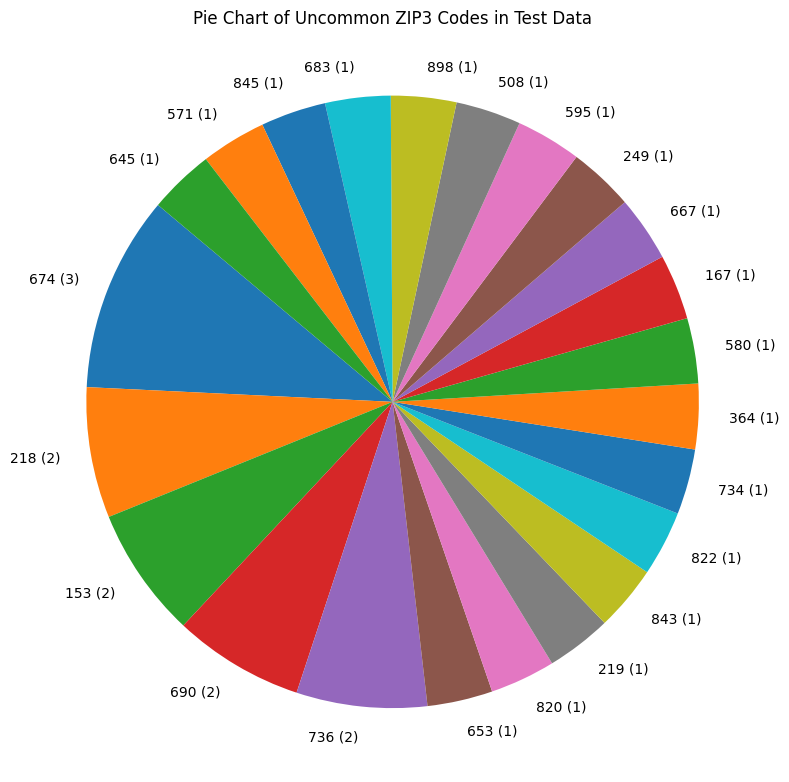

In [22]:
# Pie Chart of Uncommon ZIP3 Codes in Test Data
uncommon_zip3_counts = uncommon_zip3.value_counts()

# Plotting
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(uncommon_zip3_counts.values, labels=[f"{zip3} ({count})" for zip3, count in zip(uncommon_zip3_counts.index, uncommon_zip3_counts.values)], startangle=140)

# Adding title
plt.title('Pie Chart of Uncommon ZIP3 Codes in Test Data')

# Show plot
plt.axis('equal')  # agar pie chart menjadi lingkaran
plt.tight_layout()
plt.show()

Handling missing values in numeric columns using the median, and in categorical columns using the mode.

In [23]:
for col in categorical_columns:
    if col != 'DiagPeriodL90D':
        mode = dfTraining[col].mode()[0]
        dfTraining[col].fillna(mode, inplace=True)
        dfTest[col].fillna(mode, inplace=True)

for col in numerical_cols:
    if col != 'DiagPeriodL90D':
        median = dfTraining[col].median()
        dfTraining[col].fillna(median, inplace=True)
        dfTest[col].fillna(median, inplace=True)

dfTraining['patient_zip3'] = dfTraining['patient_zip3'].astype(int)
dfTest['patient_zip3'] = dfTest['patient_zip3'].astype(int)

## NLP Processing

In [24]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
whole_df = pd.concat([dfTraining.drop(columns=['DiagPeriodL90D']), dfTest])

In [27]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
whole_df['processed_description'] = whole_df['breast_cancer_diagnosis_desc'].apply(lambda x: ' '.join(word for word in x.lower().split() if word not in stop_words))

#replace some words that are not appropriate
mapping_dict = {
    'malig': 'malignant',
    'unsp': 'unspecified',
    'ovrlp': 'overlapping',
    'neoplm' : 'neoplasm',
    'male' : 'female'
}

def replace_words(text):
    return ' '.join(mapping_dict.get(word, word) for word in text.split())

whole_df['processed_description'] = whole_df['processed_description'].apply(replace_words)
whole_df['tokenized_description'] = whole_df['processed_description'].apply(nltk.word_tokenize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
whole_df['tokenized_description']

0       [malignant, neoplasm, unspecified, site, unspe...
1       [malignant, neoplasm, upper-outer, quadrant, r...
2       [malignant, neoplasm, central, portion, left, ...
3       [malignant, neoplasm, upper-inner, quadrant, l...
4       [malignant, neoplasm, breast, (, female, ), ,,...
                              ...                        
5787    [malignant, neoplasm, upper-outer, quadrant, r...
5788    [malignant, neoplasm, unspecified, site, left,...
5789    [malignant, neoplasm, upper-outer, quadrant, r...
5790    [malignant, neoplasm, breast, (, female, ), ,,...
5791    [malignant, neoplasm, central, portion, right,...
Name: tokenized_description, Length: 18697, dtype: object

In [29]:
whole_df['tokenized_description'] = whole_df['tokenized_description'].str.join(' ')

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(whole_df['tokenized_description'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [30]:
tfidf_df.head()

,areola,axillary,breast,central,female,inner,left,lower,malignant,neoplasm,...,portion,quadrant,right,secondary,site,sites,specified,tail,unspecified,upper
0,0.0,0.0,0.236509,0.000000,0.236787,0.00000,0.000000,0.0,0.236496,0.236496,...,0.000000,0.000000,0.000000,0.0,0.460132,0.0,0.0,0.0,0.751274,0.000000
1,0.0,0.0,0.196362,0.000000,0.196593,0.00000,0.000000,0.0,0.196351,0.196351,...,0.000000,0.436086,0.416483,0.0,0.000000,0.0,0.0,0.0,0.000000,0.483765
2,0.0,0.0,0.150697,0.633324,0.150875,0.00000,0.326976,0.0,0.150689,0.150689,...,0.633324,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.176352,0.000000,0.176559,0.62207,0.382640,0.0,0.176342,0.176342,...,0.000000,0.391647,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.434467
4,0.0,0.0,0.391489,0.000000,0.391950,0.00000,0.000000,0.0,0.391468,0.391468,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.621786,0.000000


In [31]:
tfidf_df.columns

Index(['areola', 'axillary', 'breast', 'central', 'female', 'inner', 'left',
       'lower', 'malignant', 'neoplasm', 'nipple', 'outer', 'overlapping',
       'portion', 'quadrant', 'right', 'secondary', 'site', 'sites',
       'specified', 'tail', 'unspecified', 'upper'],
      dtype='object')

In [32]:
whole_df.reset_index(inplace=True)
tokenized_df = pd.concat([whole_df, tfidf_df], axis = 1)

tokenized_df.drop(columns=['index', 'breast_cancer_diagnosis_desc', 'tokenized_description', "patient_id"], inplace=True)

##Feature Engineering

replace some 'breast_cancer_diagnosis_code' codes with icd10

https://www.icd10data.com/

In [33]:
replacements = {
    'C50922': 'C50912',
    'C50921': 'C50911',
    '1749': 'C50919',
    '1744': 'C50419',
    '1741': 'C50119',
    '1748': 'C50819',
    '1743': 'C50319',
    '1742': 'C50219',
    '1746': 'C50619',
    '19881': 'C7981',
    '1745': 'C50519',
    '1759': 'C50929'
}

for old_val, new_val in replacements.items():
    tokenized_df['breast_cancer_diagnosis_code'] = tokenized_df['breast_cancer_diagnosis_code'].replace(old_val, new_val, regex=True)

perform code splitting on 'breast_cancer_diagnosis_code'

In [34]:
tokenized_df['breast_cancer_diagnosis_code'] = tokenized_df['breast_cancer_diagnosis_code'].apply(lambda x: x.ljust(6, '0'))
tokenized_df['code1234'] = tokenized_df['breast_cancer_diagnosis_code'].str[1:4]
tokenized_df['code4'] = tokenized_df['breast_cancer_diagnosis_code'].str[3]
tokenized_df['code6'] = tokenized_df['breast_cancer_diagnosis_code'].str[5]
tokenized_df['code45'] = tokenized_df['breast_cancer_diagnosis_code'].str[3] + tokenized_df['breast_cancer_diagnosis_code'].str[4]
tokenized_df['code456'] = tokenized_df['code45'] + tokenized_df['code6']

Feature engineering on columns 'metastatic_cancer_diagnosis_code', 'patient_zip3', 'patient_age'

In [35]:
pivot_table = tokenized_df.pivot_table(index='metastatic_cancer_diagnosis_code', columns='patient_zip3', values='patient_age', aggfunc='mean', fill_value=0)
pivot_table.columns = pivot_table.columns.astype(str)
pivot_table.head()

patient_zip3,101,103,104,105,106,107,108,109,110,111,...,989,990,991,992,993,994,995,996,998,999
metastatic_cancer_diagnosis_code,,,,,,,,,,,,,,,,,,,,,
C770,0,0.000000,65.266667,48.00000,74.00,64.000000,57.0,58.0,0.0,0.000000,...,0.0,0.000000,0.000,74.000000,0.0,0,0,0,0,0
C771,0,67.000000,40.333333,0.00000,0.00,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000,0.000000,60.0,0,0,0,0,0
C772,0,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0
C773,62,54.541667,60.768116,58.59375,53.25,59.142857,48.4,54.4,57.3,55.055556,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
C774,0,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0


##Feature Selection
Thanks to @ONUR KOÇ

I used his feature selection with some additional modifications found at
https://www.kaggle.com/code/onurkoc83/catboost-joker

In [36]:
selected_df = tokenized_df[['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code', 'patient_zip3','patient_age', 'payer_type',
                            'patient_state','areola', 'axillary', 'breast', 'central', 'female', 'inner',
                            'left', 'lower', 'malignant', 'neoplasm', 'nipple', 'outer', 'overlapping', 'portion', 'quadrant',
                            'right', 'secondary', 'site', 'sites', 'specified', 'tail', 'unspecified', 'upper',
                            'code1234', 'code4', 'code6', 'code45', 'code456'
                            ]]

In [37]:
train_no_target = selected_df[:12905]
dftest = selected_df[12905:]

In [38]:
train = pd.concat([train_no_target.reset_index(drop=True), target.reset_index(drop=True)], axis=1)

train = train.merge(pivot_table, how='left', left_on='metastatic_cancer_diagnosis_code', right_index=True)
test = dftest.merge(pivot_table, how='left', left_on='metastatic_cancer_diagnosis_code', right_index=True)

In [39]:
num_cols = train.select_dtypes('number').columns.tolist()
target = 'DiagPeriodL90D'
cat_cols = [c for c in train.columns if c not in num_cols and c != 'DiagPeriodL90D']

In [40]:
num_cols.remove('DiagPeriodL90D')
num_cols.remove('patient_zip3')
cat_cols.append('patient_zip3')
# cat_cols

In [41]:
train.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,areola,axillary,breast,central,...,989,990,991,992,993,994,995,996,998,999
0,C50919,C7989,924,84,MEDICAID,CA,0.0,0.0,0.236509,0.000000,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0
1,C50411,C773,928,62,COMMERCIAL,CA,0.0,0.0,0.196362,0.000000,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
2,C50112,C773,760,43,COMMERCIAL,TX,0.0,0.0,0.150697,0.633324,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
3,C50212,C773,926,45,COMMERCIAL,CA,0.0,0.0,0.176352,0.000000,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
4,C50919,C773,836,55,COMMERCIAL,ID,0.0,0.0,0.391489,0.000000,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65


In [42]:
test.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,areola,axillary,breast,central,...,989,990,991,992,993,994,995,996,998,999
12905,C50412,C773,467,54,MEDICAID,IN,0.0,0.0,0.195575,0.0,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
12906,C50912,C787,337,52,COMMERCIAL,FL,0.0,0.0,0.258048,0.0,...,0.0,51.000000,0.000,59.000000,61.0,0,0,0,50,0
12907,C50911,C773,917,61,MEDICAID,CA,0.0,0.0,0.259864,0.0,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
12908,C50912,C779,917,64,MEDICARE ADVANTAGE,CA,0.0,0.0,0.258048,0.0,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0
12909,C50412,C779,900,40,COMMERCIAL,CA,0.0,0.0,0.195575,0.0,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0


#Model

In [43]:
train.shape, test.shape

((12905, 773), (5792, 772))

In [44]:
def score_model(model, label):

    print('model: {}'.format(label))
    X = train.copy()
    y = X.pop(target)

    skf = StratifiedKFold(n_splits=5,random_state=SEED, shuffle=True)

    val_predictions = np.zeros(len(train))
    score_list = []
    for fold, (trx_idx, val_idx) in enumerate(skf.split(X,y)):
        X_train = X.iloc[trx_idx]
        y_train = y.iloc[trx_idx]
        X_val   = X.iloc[val_idx]
        y_val   = y.iloc[val_idx]

        model.fit(X_train,y_train)
        y_pred_train = model.predict_proba(X_train)[:,1]
        y_pred_val   = model.predict_proba(X_val)[:,1]
        auc_train = roc_auc_score(y_train,y_pred_train)
        auc_val   = roc_auc_score(y_val,y_pred_val)

        val_predictions[val_idx] = y_pred_val
        score_list.append(auc_val)
        print(f'fold: {fold} - AUC Train: {auc_train} - AUC Val {auc_val}')

    print(f'AUC MEAN {np.mean(score_list)} - Std: {np.std(score_list)}')

    return score_list, val_predictions

#Submit

In [45]:
cat_transformer= Pipeline([('cat',CatBoostEncoder())])
preprocess_othermodels = ColumnTransformer([('cat',cat_transformer,cat_cols)])

In [46]:
SEED = 42

# hyperparameter tunning results using optuna
params_cat = {'n_estimators': 498,
              'learning_rate': 0.041065977548158134,
              'depth': 7, 'l2_leaf_reg': 1.749992046876115,
              'random_strength': 20,
              'bagging_temperature': 5.652374052219557,
              'border_count': 74,
              'scale_pos_weight': 1.5842586529176916,
              'grow_policy': 'SymmetricTree',
              'logging_level': 'Silent'}

In [47]:
score_list, oof_list = pd.DataFrame(), pd.DataFrame()

models = [
    ('cb', CatBoostClassifier(cat_features=cat_cols, random_state=SEED, **params_cat)),
    ('logreg', make_pipeline(preprocess_othermodels,
                                  LogisticRegression(random_state=SEED))),
    ('lgbm',make_pipeline(preprocess_othermodels,
                                 LGBMClassifier(random_state=SEED))),
    ('RF',make_pipeline(preprocess_othermodels,
                               RandomForestClassifier(random_state=SEED))),
    ('Extratrees',make_pipeline(preprocess_othermodels,
                                       ExtraTreesClassifier(random_state=SEED))),
    ('XGB',make_pipeline(preprocess_othermodels,
                                 XGBClassifier(random_state=SEED)))
]

for label, model in models:
    score_list[label], oof_list[label] = score_model(model,label)

model: cb
fold: 0 - AUC Train: 0.8467361820658783 - AUC Val 0.8090293515865272
fold: 1 - AUC Train: 0.8543055086080403 - AUC Val 0.8147040257921112
fold: 2 - AUC Train: 0.8488028863759165 - AUC Val 0.7997251009584976
fold: 3 - AUC Train: 0.8511619389985327 - AUC Val 0.800980200098846
fold: 4 - AUC Train: 0.8495637562194788 - AUC Val 0.79964539688149
AUC MEAN 0.8048168150634945 - Std: 0.006047993599155259
model: logreg
fold: 0 - AUC Train: 0.7297058095309431 - AUC Val 0.7333696963178638
fold: 1 - AUC Train: 0.7439996274074472 - AUC Val 0.7489046291103616
fold: 2 - AUC Train: 0.7316618404087507 - AUC Val 0.7237655150867974
fold: 3 - AUC Train: 0.7363661014719326 - AUC Val 0.7177800269905532
fold: 4 - AUC Train: 0.7305934576716935 - AUC Val 0.7346081504300819
AUC MEAN 0.7316856035871315 - Std: 0.010620406307491477
model: lgbm
[LightGBM] [Info] Number of positive: 6448, number of negative: 3876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 s

<Axes: >

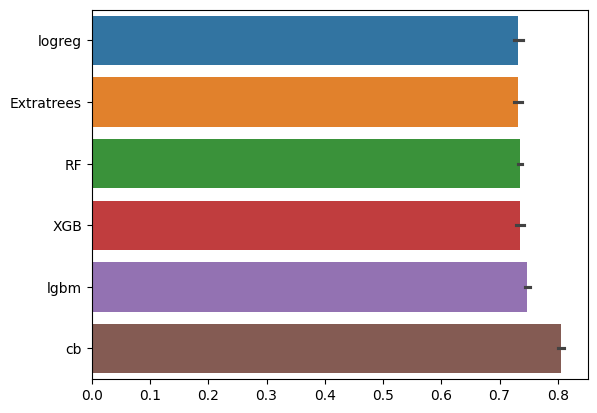

In [48]:
sns.barplot( data=score_list.reindex(score_list.mean().sort_values().index,axis=1),orient='h' )

In [49]:
w = RidgeClassifier().fit(oof_list,train.DiagPeriodL90D).coef_[0]
w

array([ 1.99381485, -0.19833217,  0.12396955, -0.12091363,  0.06573106,
        0.05371968])

In [50]:
voter = VotingClassifier(models, weights = w, voting = 'soft')

X = train.copy()
y = X.pop('DiagPeriodL90D')

voter.fit(X,y)

[LightGBM] [Info] Number of positive: 8060, number of negative: 4845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 12905, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624564 -> initscore=0.508966
[LightGBM] [Info] Start training from score 0.508966


VotingClassifier(estimators=[('cb',
                              <catboost.core.CatBoostClassifier object at 0x0000029A224CA5E0>),
                             ('logreg',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('cat',
                                                                                Pipeline(steps=[('cat',
                                                                                                 CatBoostEncoder())]),
                                                                                ['breast_cancer_diagnosis_code',
                                                                                 'metastatic_cancer_diagnosis_code',
                                                                                 'payer_type',
                                                                                 'patient_state',
                                                                                 'code1234',
                                                                                 'code4',
                                                                                 'code6',...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                 voting='soft',
                 weights=array([ 1.99381485, -0.19833217,  0.12396955, -0.12091363,  0.06573106,
        0.05371968]))

#Submission

In [51]:
dfSub["DiagPeriodL90D"] = voter.predict_proba(test)[:,1]
dfSub.to_csv('submission.csv',index=False)

In [52]:
dfSub

,patient_id,DiagPeriodL90D
0,573710,0.856469
1,593679,0.896412
2,184532,0.853811
3,447383,0.832427
4,687972,0.822013
...,...,...
5787,977076,0.886986
5788,922960,0.882721
5789,759690,0.930600
5790,911717,0.115927


In [53]:
dfSub.describe()

,patient_id,DiagPeriodL90D
count,5792.000000,5792.000000
mean,549946.787983,0.681203
std,260988.833446,0.309124
min,100266.000000,0.027418
25%,320284.500000,0.642231
50%,553042.000000,0.841331
75%,778552.250000,0.878418
max,999890.000000,0.988028
